total_sum: 0.0613448
Operations sorted by execution time (duration):
Operation: matmul, dtype:F32, Duration: 0.013441056, Count: 14026 Perc:0.21910668874949465
Operation: copy2d dtype:F32, Duration: 0.009932799999999999, Count: 12216 Perc:0.1619175545441504
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.009387007999999999, Count: 12240 Perc:0.1530204353099203
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.005783552, Count: 6120 Perc:0.09427941732632596
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.0034590720000000005, Count: 3060 Perc:0.05638737105671549
Operation: unary op:Exp, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.003375104, Count: 3060 Perc:0.05501858348221854
Operation: copy strided dtype:F32, Duration: 0.0026675199999999996, Count: 3048 Perc:0.043484044287372355
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBuffer, Dur

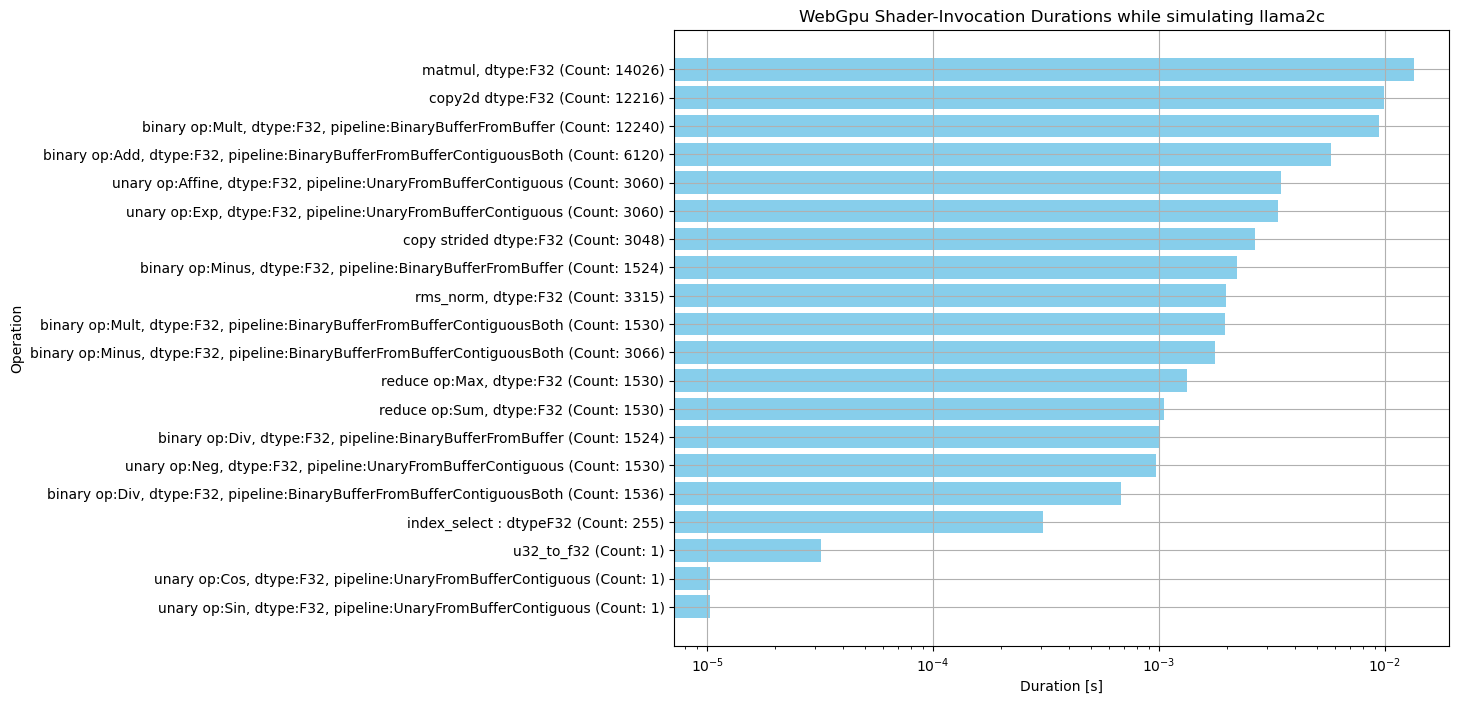

In [28]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('candle-examples\wgpu_infollama2-c_small.json', 'r') as file:
    data = json.load(file)

    # Add a new key for duration to each operation
for operation in data:
    operation['duration'] = operation['count'] * operation['mean']

# Sort the list of operations by duration in descending order
sorted_operations = sorted(data, key=lambda x: x['duration'], reverse=True)


# Extract labels and durations for plotting
labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
#labels = [op['label'] for op in sorted_operations]
durations = [op['duration'] for op in sorted_operations]
total_sum = sum(durations)
print(f"total_sum: {sum(durations)}")

# Print the operations along with their durations
print("Operations sorted by execution time (duration):")
for operation in sorted_operations:
    print(f"Operation: {operation['label']}, Duration: {operation['duration']}, Count: {operation['count']} Perc:{operation['duration']/total_sum}")


# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(labels, durations, color='skyblue')
plt.grid()
plt.xscale('log')
plt.xlabel('Duration [s]')
plt.ylabel('Operation')
plt.title('WebGpu Shader-Invocation Durations while simulating llama2c')
plt.gca().invert_yaxis()  # To have the longest duration at the top
plt.show()

